In [2]:
%matplotlib inline
import pandas as pd

training_features = pd.read_csv("results_training.csv")

training_features.head()

,Unnamed: 0,image_name,colony_area,ratio_cobelstone,is_good,ratio_debri,ratio_inner_good,ratio_outer_good
0,0,Good0000_Probabilities.h5,2445,0.101840,1.0,0.0,0.08589,0.812270
1,1,Good0001_Probabilities.h5,7023,0.156486,1.0,0.0,0.00000,0.843514
2,2,Good0002_Probabilities.h5,6788,0.261786,1.0,0.0,0.00000,0.738214
3,3,Good0003_Probabilities.h5,2577,0.020567,1.0,0.0,0.00000,0.979433
4,4,Good0004_Probabilities.h5,5235,0.302197,1.0,0.0,0.00000,0.697803


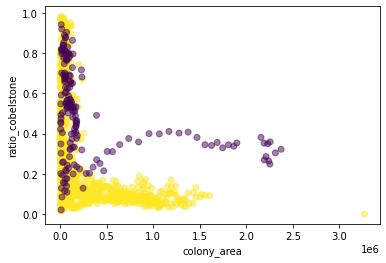

<Figure size 1152x1152 with 0 Axes>

In [3]:

import matplotlib.pyplot as plt

x = training_features.colony_area
y = training_features.ratio_cobelstone
colors = training_features.is_good

plt.xlabel("colony_area")
plt.ylabel("ratio_cobelstone")
plt.scatter(x, y, c=colors, alpha=0.5)
plt.figure(figsize=(16, 16))
plt.show()

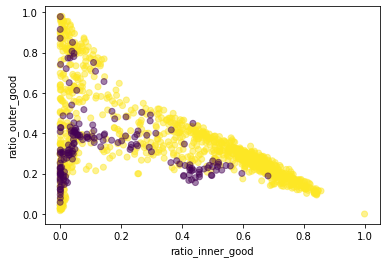

<Figure size 1152x1152 with 0 Axes>

In [5]:

import matplotlib.pyplot as plt

x = training_features.ratio_inner_good
y = training_features.ratio_outer_good
colors = training_features.is_good

plt.xlabel("ratio_inner_good")
plt.ylabel("ratio_outer_good")
plt.scatter(x, y, c=colors, alpha=0.5)
plt.figure(figsize=(16, 16))
plt.show()

In [20]:
import numpy as np

training_features_filtered = training_features.loc[training_features.colony_area > 50000]
X = training_features_filtered[
    ["ratio_cobelstone", "ratio_debri", "ratio_inner_good", "ratio_outer_good"]
]
Y = training_features_filtered.is_good

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X, Y)

RandomForestClassifier(max_depth=3, random_state=0)

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
p2 = clf.predict(X.to_numpy())
y2 = Y.to_numpy()
print("Precision", precision_score(y2, p2))
print("Recall", recall_score(y2, p2))
print("Precision Bad", precision_score(1- y2, 1- p2))
print("Recall Bad", recall_score(1- y2, 1- p2))
confusion_matrix(y2, p2)

Precision 0.9582577132486388
Recall 0.9312169312169312
Precision Bad 0.7364864864864865
Recall Bad 0.8257575757575758


array([[109,  23],
       [ 39, 528]], dtype=int64)